# Lógica difusa: El problema de la propina

En este ejercicio trabajaremos con la librería de [scikit-fuzzy](https://pythonhosted.org/scikit-fuzzy/), simulando el [problema de la propina](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html). Se busca determinar la cantiadad de propina adecuada a dar en un restaurant, en base a la calidad de la comida y servicio usando lógica difusa.

In [31]:
# Importamos la librería de skfuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 1. Definición de nuestras variables y funciones de membresía
Comenzamos definiendo los rangos dentro de los cuales se calificará cada variable, así como las variables linguísticas que se usarán en las reglas

In [32]:
# Variables de entrada: antecedentes
comida = ctrl.Antecedent(np.arange(0, 30, 1), 'comida')  # Arange es no inclusivo entonces se genera 0,1,2,...,10
# TODO: Define el universo de las variables restantes
servicio = ctrl.Antecedent(np.arange(0, 10, 1), 'servicio')

# Variables de salida: Consecuentes
propina = ctrl.Consequent(np.arange(0, 35, 1), 'propina')

# Definimos valores linguísticos para cada variable
comida.automf(3, 
               variable_type='quality',
               names=['mala', 'normal', 'yummy'])
servicio.automf(3,
                variable_type='quality',
                names=['pesimo', 'equis', 'super'])
propina.automf(
    3,
    variable_type='quality',
    names=['baja', 'normal', 'alta'])

## Funciones de membresía
Existen múltiples opciones para las funciones de membresía. Aquí mostramos las más comunes
| Tipo de funcion | Metodo de skfuzzy | Argumentos                                           |
|-----------------|-------------------|------------------------------------------------------|
| Triangular      | trimf             | 3 puntos dentro del rango para definir el tríángulo  |
| Trapezoide      | trapmf            | 4 puntos dentro del rango para definir el trapezoide |
| Gaussiana       | gaussmf           | Media y desviación estándar                          |
| Sigmoide        | sigmf             | Offset/sesgo y multiplicador de 'z'                  |

### Calidad de la comida
La calidad de la comida está definida dentro de un rango de 0 a 10
```
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad') 
```
Entonces definimos los puntos de los triángulos dentro de este rango

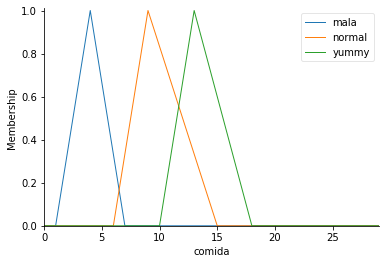

In [33]:
# Funciones de membresía : triangulares
# TODO: Define las funciones de membresía
comida['mala'] = fuzz.trimf(comida.universe, [1, 4, 7]) # Defines tres puntos para cada triangulo
comida['normal'] = fuzz.trimf(comida.universe, [6, 9, 15]) 
comida['yummy'] = fuzz.trimf(comida.universe, [10, 13, 18]) 
comida.view()

### Calidad del servicio
La calidad del servicio está definida dentro de un rango de 0 a 10
```
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio') 
```
Entonces definimos los puntos de los trapezoides de acuerdo a este rango

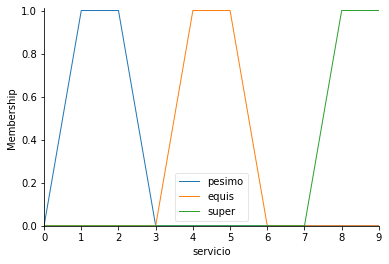

In [34]:
# Funciones de membresía: Trapezoide
# TODO: Define las funciones de membresía
servicio['pesimo'] = fuzz.trapmf(servicio.universe, [0, 1, 2, 2]) # 4 puntos para un trapezoide
servicio['equis'] = fuzz.trapmf(servicio.universe, [3, 4, 5, 6])
servicio['super'] = fuzz.trapmf(servicio.universe, [7, 8, 9, 15])
servicio.view()

### Propina
La proina está definida dentro de un rango de 0% a 20%
```
propina = ctrl.Consequent(np.arange(0, 21, 1), 'propina')
```
Entonces definimos los puntos de las distribuciones gaussianas de acuerdo a este rango

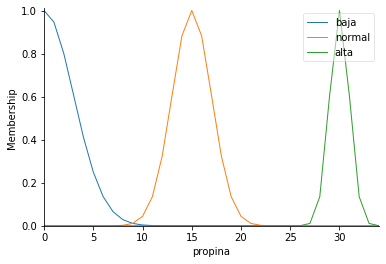

In [35]:
# Funciones de membresía: Gaussiana
# TODO: Define las funciones de membresía
propina['baja'] = fuzz.gaussmf(propina.universe, mean=0, sigma=3) # Defines la media y desviación estándar
propina['normal'] = fuzz.gaussmf(propina.universe, mean=15, sigma=2) 
propina['alta'] = fuzz.gaussmf(propina.universe, mean=30, sigma=1)
propina.view()

# Otra opción: Función sigmoide...
#propina['baja'] = fuzz.sigmf(propina.universe, 10, 0.7) # Defines la media y desviación estándar
#propina['normal'] = fuzz.sigmf(propina.universe, 15, 0.4)
#propina['alta'] = fuzz.sigmf(propina.universe, 25, 0.3)
#propina.view()


## 2. Definiendo el sistema de reglas
En este ejercicio define tus propias reglas.. por ejemplo:
1. Si el *servicio* es SUPER o la *comida* es YUMMY, entonces la *propina* es ALTA
2. Si el *servicio* es EQUIS, entonces la *propina* es NORMAL
3. Si el *servicio* es PÉSIMO y la *comida* es MALA, entonces la *propina* es BAJA

Asegúrate de que exista solo un consecuente por regla y que todos los posibles conjuntos de salida se mencionen en al menos una regla

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa23380750>)

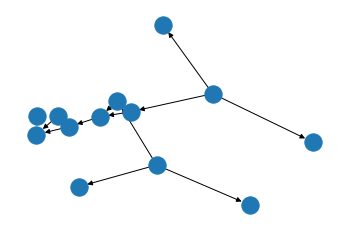

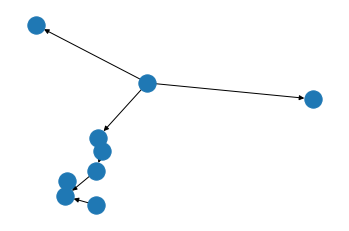

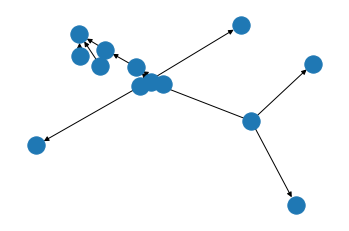

In [36]:
# TODO: Define las reglas, utiliza "|" para expresar el OR, "~" para el NOT,  y "&" para expresar el AND
regla1 = ctrl.Rule((servicio['super'] | comida['yummy']), propina['alta'])
regla2 = ctrl.Rule(servicio['equis'], propina['normal'])
regla3 = ctrl.Rule((servicio['pesimo'] | comida['mala']), propina['baja'])

regla1.view()
regla2.view()
regla3.view()

# 3. Inferencia y control
Ahora que tenemos todo, definimos el sistema de control. Para eso tenemos que crear un simulador de sistema de control `ControlSystemSimulation`. Este objeto representa un controlador aplicado a un conjunto de circunstancias específicas.

29.999702544047228


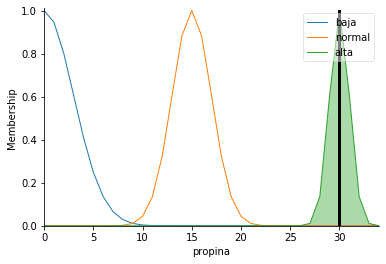

In [37]:
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
dar_propina = ctrl.ControlSystemSimulation(control_propina)

# Definimos las variables crisp
# TODO: ¿Cuanto calificarías el servicio y comida de algún restaurante?
dar_propina.input['servicio'] =11
dar_propina.input['comida'] = 13

# Se realiza la inferencia
dar_propina.compute()
print(dar_propina.output['propina'])
propina.view(sim=dar_propina)